# Dataset
## 生成 Dataset 的2种方式
1) 直接通过torchvision.datasets 获取 Dataset
2) 自定义 Dataset，类似如下代码 

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import os

class CustomDataset(Dataset):  # 继承 torch.utils.data.Dataset 类
    def __init__(self, data_folder, images_class， transform=None):
        self.data_folder = data_folder
        self.transform = transform
        self.file_list = os.listdir(data_folder)
        self.images_class = images_class

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_name = os.path.join(self.data_folder, self.file_list[idx])
        image = Image.open(img_name)  # Assuming images are RGB
        label = self.images_class[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


data_folder = "path/to/your/data"
custom_dataset = CustomDataset(data_folder, transform=transforms.ToTensor())

# 获取索引为 0 的样本
sample_image, sample_label = custom_dataset[0]
print("Sample Image Shape:", sample_image.shape)
print("Sample Label:", sample_label)

## Dataset与Dataloader的使用结构
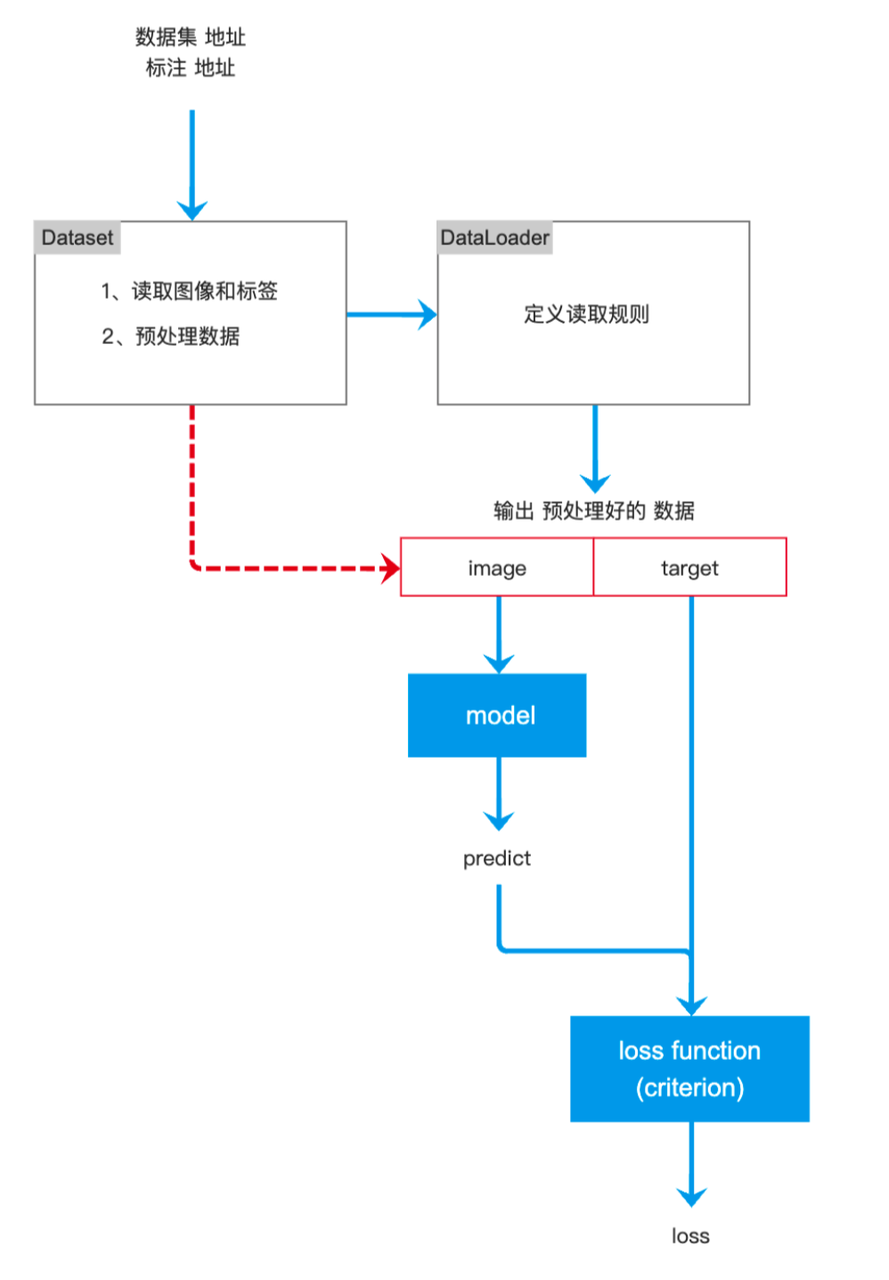

## Dataset的工作原理

In [ ]:
import torch
from torch.utils import data


class MyDataset(torch.utils.data.Dataset):
    def __init__(self):
        self.data = torch.arange(0, 20)

    def __getitem__(self, index):
        x = self.data[index]
        y = x*2
        return y

    def __len__(self):
        return len(self.data)


dataset = MyDataset()
print(len(dataset))  # 20
print(dataset[3])  # tensor(6)

1. 对自定义的 MyDataset 类的实例化对象 dataset 使用 len 方法 ：len(dataset)， 这时会调用类中定义的 __len__ 方法， 并输出返回的 len(self.data) 的结果
2. 对 MyDataset 类的对象 dataset 使用索引时 ：dataset[3]，这时会将索引值 3 当作参数传给 __getitem__ 方法，返回的 y 就是 dataset[3] 接收到的结果。